In [1]:
from classy import Class
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
import fisher_mod as fmod

In [2]:
run_5e7 = True
run_5e6 = True
run_5e5 = True

num = 25
master = {'run': False,
          'dmeff_mass': 1.,
          'fname': '1GeV_5e7step_num25',
          'survey': 'planck',
          'polarization': True,
          'param':['output','lensing','omega_b','omega_dmeff','H0','n_s','A_s','tau_reio','cc_dmeff_p'],
          'cv':['tCl,pCl','no',0.0222,0.1197,67.31,0.9655,2.2e-9,0.06,0.],
          'delta':[0.00022,0.0012,0.67,0.0097,0.022e-9,0.0006,5e7]}

if run_5e7 == True:
    print '1Gev PLANCK CONSTRAINTS -- 5e7$'
    fmod.forecast(master)
    ell,cl_tt_5e7,cl_te_5e7,cl_ee_5e7 = fmod.output_cl(master)
    deriv_tt_5e7,deriv_te_5e7,deriv_ee_5e7 = fmod.output_deriv(master)

deg = 6
if run_5e6 == True:
    print '1Gev PLANCK CONSTRAINTS -- 5e6'
    master.update({'fname': '1GeV_5e6step_num25'})
    master.update({'delta':[0.00022,0.0012,0.67,0.0097,0.022e-9,0.0006,5e6]})
    fmod.forecast(master)
    ell,cl_tt_5e6,cl_te_5e6,cl_ee_5e6 = fmod.output_cl(master)
    deriv_tt_5e6,deriv_te_5e6,deriv_ee_5e6 = fmod.output_deriv(master)

if run_5e5 == True:
    print '1GeV PLANCK CONSTRAINTS -- 5e5$'
    master.update({'fname': '1GeV_5e5step_num25'})
    master.update({'delta':[0.00022,0.0012,0.67,0.0097,0.022e-9,0.0006,5e5]})
    fmod.forecast(master)
    ell,cl_tt_5e5,cl_te_5e5,cl_ee_5e5 = fmod.output_cl(master)
    deriv_tt_5e5,deriv_te_5e5,deriv_ee_5e5 = fmod.output_deriv(master)

mod = ell*(ell+1.0)/(2*np.pi)

1Gev PLANCK CONSTRAINTS -- 5e7$
omega_b :  0.000157543686374
omega_dmeff :  0.00153157838768
H0 :  0.686210870294
n_s :  0.00475662171028
A_s :  2.0880706342e-11
tau_reio :  0.00447072281947
cc_dmeff_p :  22050.331328
p_cc :  1.58448447799e-29
1Gev PLANCK CONSTRAINTS -- 5e6
omega_b :  0.00015696910304
omega_dmeff :  0.0015480601251
H0 :  0.688788070598
n_s :  0.0044160899462
A_s :  2.06985421934e-11
tau_reio :  0.00446878533974
cc_dmeff_p :  8489170.07175
p_cc :  2.34848731417e-24
1GeV PLANCK CONSTRAINTS -- 5e5$
omega_b :  0.000160031476381
omega_dmeff :  0.00160819270227
H0 :  0.719591631483
n_s :  0.00419659430936
A_s :  2.05921436959e-11
tau_reio :  0.00447185588246
cc_dmeff_p :  28490235.0225
p_cc :  2.64514700842e-23


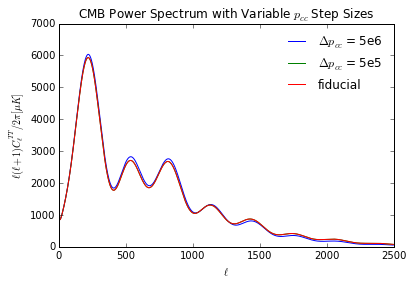

In [3]:
#plt.plot(cl_tt_5e7[6,2:,24]*mod[6,2:,24],label = '$\Delta p_{cc}$ = 5e7')
plt.plot(cl_tt_5e6[6,2:,24]*mod[6,2:,24],label = '$\Delta p_{cc}$ = 5e6')
plt.plot(cl_tt_5e5[6,2:,24]*mod[6,2:,24],label = '$\Delta p_{cc}$ = 5e5')
plt.plot(cl_tt_5e5[6,2:,0]*mod[6,2:,0],label = 'fiducial')
plt.legend(frameon = False)
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_{\ell}^{TT}/2\pi[\mu K]$')
plt.title('CMB Power Spectrum with Variable $p_{cc}$ Step Sizes')
plt.show()

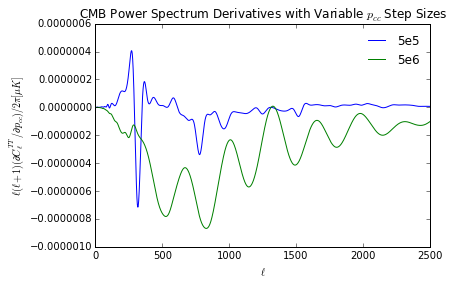

In [4]:
plt.plot(ell[6,2:,24],deriv_tt_5e5[6,2:]*mod[6,2:,24],label = '5e5')
plt.plot(ell[6,2:,24],deriv_tt_5e6[6,2:]*mod[6,2:,24],label = '5e6')
#plt.plot(ell[6,2:,24],deriv_te_5e7[6,2:]*mod[6,2:,24],label = '5e7')
plt.legend(frameon = False,loc = 'upper right')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)(\partial{C_{\ell}^{TT}}/\partial{p_{cc}})/2\pi[\mu K]$')
plt.title('CMB Power Spectrum Derivatives with Variable $p_{cc}$ Step Sizes')
plt.show()

In [5]:
fsky = 0.5
noise = fmod.noise(ell,40.*np.pi/10800,7.*np.pi/10800)
prefactor = np.sqrt(2./((2.*ell[6,2:,0]+1.)*fsky))
fiducial_tt = cl_tt_5e5[6,2:,0]*mod[6,2:,0]
#power spectrum modified by p_cc
cl_pcc_5e5 = cl_tt_5e5[6,2:,24]*mod[6,2:,24]
cl_pcc_5e6 = cl_tt_5e6[6,2:,24]*mod[6,2:,24]
cl_pcc_5e7 = cl_tt_5e7[6,2:,24]*mod[6,2:,24]
#fractional change in cl due to p_cc
Delta_cl_5e5 = (fiducial_tt-cl_pcc_5e5)/fiducial_tt
Delta_cl_5e6 = (fiducial_tt-cl_pcc_5e6)/fiducial_tt
Delta_cl_5e7 = (fiducial_tt-cl_pcc_5e7)/fiducial_tt
#cosmic variance noise
delta_cv = fiducial_tt*prefactor
#shot noise
delta_noise = noise*prefactor*mod[6,2:,24]
#total error bars on Delta_cl
delta_cl = np.sqrt(np.square(delta_cv)+np.square(delta_noise))/fiducial_tt

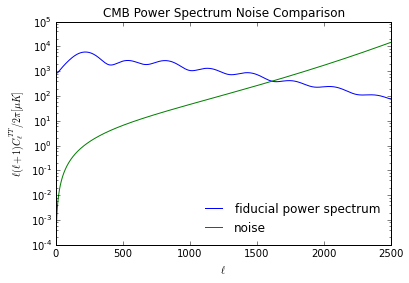

In [6]:
plt.plot(ell[6,2:,0],cl_tt_5e5[6,2:,0]*mod[6,2:,0],label = 'fiducial power spectrum')
plt.plot(ell[0,2:,12],mod[6,2:,24]*noise,label = 'noise')
plt.legend(frameon = False, loc = 'lower right')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_{\ell}^{TT}/2\pi[\mu K]$')
plt.title('CMB Power Spectrum Noise Comparison')
plt.show()

/Users/etrott12/Downloads/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


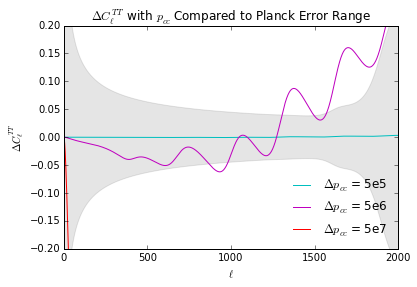

In [7]:
plt.plot(ell[6,2:,0],Delta_cl_5e5,'c',label = '$\Delta p_{cc}$ = 5e5')
plt.plot(ell[6,2:,0],Delta_cl_5e6,'m',label = '$\Delta p_{cc}$ = 5e6')
plt.plot(ell[6,2:,0],Delta_cl_5e7,'r',label = '$\Delta p_{cc}$ = 5e7')
#plt.plot(ell[6,2:,0],Delta_cl_5e7)
plt.fill_between(ell[6,2:,0],delta_cl,-delta_cl,alpha = 0.1,color = 'k')
plt.ylim(-0.2,0.2)
plt.xlim(0,2000)
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_{\ell}^{TT}$')
plt.title('$\Delta C_{\ell}^{TT}$ with $p_{cc}$ Compared to Planck Error Range')
plt.legend(frameon = False,loc = 'lower right')
plt.show()